In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import textwrap
import matplotlib.colors as colors
import matplotlib.cm as cmx

import warnings
warnings.simplefilter('ignore', FutureWarning)

# making data easier to work with

In [2]:
chicago2015 = pd.read_csv("chicago2015_all.csv")\
[['Teaching_Hospital_Name','Recipient_Zip_Code', 'Physician_Profile_ID', 'Physician_First_Name','Physician_Last_Name',\
  'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',\
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',\
 'Total_Amount_of_Payment_USDollars', 'Date_of_Payment', 'Form_of_Payment_or_Transfer_of_Value',\
 'Nature_of_Payment_or_Transfer_of_Value']]
chicago2020 = pd.read_csv("chicago2020_all.csv")\
[['teaching_hospital_name','recipient_zip_code','physician_profile_id', 'physician_first_name','physician_last_name',\
  'applicable_manufacturer_or_applicable_gpo_making_payment_name','applicable_manufacturer_or_applicable_gpo_making_payment_id',\
 'applicable_manufacturer_or_applicable_gpo_making_payment_state',\
 'total_amount_of_payment_usdollars', 'date_of_payment', 'form_of_payment_or_transfer_of_value',\
 'nature_of_payment_or_transfer_of_value']]

ownership2020 = pd.read_csv("OP_DTL_OWNRSHP_PGYR2020_P01212022.csv")\
[['Recipient_Zip_Code', 'Physician_Profile_ID', 'Physician_First_Name','Physician_Last_Name','Recipient_Primary_Business_Street_Address_Line1']]
ownership2015 = pd.read_csv("OP_DTL_OWNRSHP_PGYR2015_P01212022.csv")\
[['Recipient_Zip_Code', 'Physician_Profile_ID', 'Physician_First_Name','Physician_Last_Name','Recipient_Primary_Business_Street_Address_Line1']]

C:\Users\grace\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23,24,25,52,53,57,58,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\grace\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
chicago2015.head() #checking what they look like!
print(ownership2020.columns)
ownership2020.head()

Index(['Recipient_Zip_Code', 'Physician_Profile_ID', 'Physician_First_Name',
       'Physician_Last_Name',
       'Recipient_Primary_Business_Street_Address_Line1'],
      dtype='object')


,Recipient_Zip_Code,Physician_Profile_ID,Physician_First_Name,Physician_Last_Name,Recipient_Primary_Business_Street_Address_Line1
0,07002,134335,Aysha,Khalid,1225 Kennedy Blvd
1,07042,997719,Jamie,Koprivnikar,39 High Street
2,43214,32057,Peter,Kourlas,810 Jasonway Ave
3,07746,887574,Gurpreet,Lamba,1 Milton Ct
4,08873,138170,Craig,Lampert,75 Veronica Ave


In [5]:
# renaming things that are too long
ownership2020.columns = ['recipient_zip','dr_id','dr_firstname','dr_lastname','recipient_address1']
ownership2015.columns = ['recipient_zip','dr_id','dr_firstname','dr_lastname','recipient_address1']

chicago2015.columns = ['teaching_hospital','recipient_zip','dr_id','dr_firstname','dr_lastname','payer_name','payer_id','payer_state','total_usd',\
                       'payment_date','form','nature']
chicago2015['nature'] = chicago2015['nature'].replace("Compensation for serving as faculty or as a speaker for a non-accredited and noncertified continuing education program","Continuing education speaker")
chicago2015['nature'] = chicago2015['nature'].replace("Compensation for serving as faculty or as a speaker for an accredited or certified continuing education program", "Continuing education speaker")
chicago2015['nature'] = chicago2015['nature'].replace("Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program", "Non-continuing education speaker")
chicago2015['nature'] = chicago2015['nature'].replace("Current or prospective ownership or investment interest","Ownership/investment \ninterest")
chicago2015['nature'] = chicago2015['nature'].replace("Space rental or facility fees (teaching hospital only)","Facility fees")

chicago2020.columns = ['teaching_hospital','recipient_zip','dr_id','dr_firstname','dr_lastname','payer_name','payer_id','payer_state','total_usd',\
                       'payment_date','form','nature']
chicago2020['nature'] = chicago2020['nature'].replace("Compensation for serving as faculty or as a speaker for a non-accredited and noncertified continuing education program","Continuing education speaker")
chicago2020['nature'] = chicago2020['nature'].replace("Compensation for serving as faculty or as a speaker for an accredited or certified continuing education program", "Continuing education speaker")
chicago2020['nature'] = chicago2020['nature'].replace("Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program", "Non-continuing education speaker")
chicago2020['nature'] = chicago2020['nature'].replace("Current or prospective ownership or investment interest","Ownership/investment \ninterest")
chicago2020['nature'] = chicago2020['nature'].replace("Space rental or facility fees (teaching hospital only)","Facility fees")

#checking what it looks like
chicago2020.head()

,teaching_hospital,recipient_zip,dr_id,dr_firstname,dr_lastname,payer_name,payer_id,payer_state,total_usd,payment_date,form,nature
0,NaN,60693-0626,77195.0,RAMI,HADDAD,"Acceleron Pharma, Inc.",100000776816,MA,10.99,05/21/2020,In-kind items and services,Food and Beverage
1,NaN,60637-1426,1334942.0,SANDEEP,BHAVE,"Acceleron Pharma, Inc.",100000776816,MA,16.72,08/11/2020,In-kind items and services,Food and Beverage
2,NaN,60637-1447,80522.0,HUSAM,BALKHY,"LivaNova USA, Inc.",100000176739,TX,115.37,02/21/2020,In-kind items and services,Food and Beverage
3,NaN,60611-3246,105846.0,MICHAEL,MACKEN,"LivaNova USA, Inc.",100000176739,TX,371.28,01/23/2020,Cash or cash equivalent,Travel and Lodging
4,NaN,60611-3246,105846.0,MICHAEL,MACKEN,"LivaNova USA, Inc.",100000176739,TX,455.73,01/23/2020,Cash or cash equivalent,Travel and Lodging


# defining functions

In [6]:
def x_vs_y(y, x = 'total_usd', year1 = chicago2015, year2 = chicago2020):
    """compares x (default is money) vs y (variable that is a column name)""" ##realizing money shouldve been y and column name as x but! oh well!
    two_var1 = year1[[x,y]]
    two_var1 = two_var1.groupby(by = y).sum().sort_values(by = x, ascending = False).reset_index()
    two_var2 = year2[[x,y]]
    two_var2 = two_var2.groupby(by = y).sum().sort_values(by = x, ascending = False).reset_index()
    xy_table = pd.merge(two_var1, two_var2, how='inner', on=y)
    xy_table.columns = [y, x+'2015',x+'2020']
    return xy_table
# merges the rows only when there's an x value for both years

In [7]:
def vs_year(y_data, x1 = 'total_usd2015', x2 = 'total_usd2020'):
    """compares money diff btwn two years"""
    change_wrt_y = y_data
    change_wrt_y['change'] = y_data[x2]-y_data[x1]
    change_wrt_y['abs_change'] = np.abs(change_wrt_y['change'])
    change_wrt_y['percent_change'] = (change_wrt_y['change'] / change_wrt_y[x1])*100
    change_wrt_y['abs_percent_change'] = np.abs(change_wrt_y['percent_change'])
    change_wrt_y = change_wrt_y.sort_values(by = 'abs_percent_change', ascending = False)
    return change_wrt_y

In [8]:
def pretty_table(data):
    """formats the table pretty"""
    return data.round(2).style.format({'total_usd2015':"{:,}", 'total_usd2020':"{:,}",'change':"{:,}",'abs_change':"{:,}"})

In [9]:
def wrap_labels(ax, width, break_long_words=False):
    """for graphs, makes the xtick labels multiple lines when too long"""
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=90)

## where does money go

### zip codes

In [13]:
#truncating the zip codes to just the first 5 characters, since many are more specific than that
chicago2015_zip = chicago2015
chicago2015_zip['recipient_zip'] = chicago2015_zip['recipient_zip'].str[0:5]
chicago2020_zip = chicago2020
chicago2020_zip['recipient_zip'] = chicago2020_zip['recipient_zip'].str[0:5]

#adding context of median income for each zip code
zip_income = pd.read_csv("zip_income.csv")
zip_income = zip_income.rename(columns = {'zip_code':'recipient_zip'})
zip_income['recipient_zip'] = zip_income['recipient_zip'].apply(str)

#making a table of the zip codes
zip = x_vs_y('recipient_zip', year1 = chicago2015_zip, year2 = chicago2020_zip)
zip = pd.merge(zip, zip_income, how='inner', on='recipient_zip')
zip[['total_usd2015','total_usd2020']] = zip[['total_usd2015','total_usd2020']]/1000000
zip['income'] = zip['income']/1000

zip.head(10).style.format({'total_usd2015':"{:,}", 'total_usd2020':"{:,}", 'income':"{:,}"})
# uncomment for the graph
# chicago2015.query('recipient_zip == "60601"').groupby(by = 'payer_name').sum().head(50)
# zip.sort_values(by = 'recipient_zip')

,recipient_zip,total_usd2015,total_usd2020,income
0,60612,11.97342497,5.54592981,25.143
1,60611,11.123933560000001,4.54539707,69.889
2,60637,5.84908591,2.06003411,23.228
3,60614,0.89281275,0.15086413,68.324
4,60657,0.85854385,0.51808477,55.647
5,60616,0.61268048,0.06988309,30.625
6,60647,0.49729321000000004,0.011762360000000001,35.283
7,60602,0.37699946,0.14282746,23.75
8,60608,0.3196561,0.11774731999999999,28.026
9,60610,0.26637032,0.012209010000000001,51.294


In [14]:
#zip codes that had the largest change
change_wrt_zip = vs_year(zip).set_index('recipient_zip')
pretty_table(change_wrt_zip.sort_values(by = 'abs_change',ascending=False).head())

,total_usd2015,total_usd2020,income,change,abs_change,percent_change,abs_percent_change
recipient_zip,,,,,,,
60611,11.12,4.55,69.890000,-6.58,6.58,-59.140000,59.140000
60612,11.97,5.55,25.140000,-6.43,6.43,-53.680000,53.680000
60637,5.85,2.06,23.230000,-3.79,3.79,-64.780000,64.780000
60614,0.89,0.15,68.320000,-0.74,0.74,-83.100000,83.100000
60616,0.61,0.07,30.620000,-0.54,0.54,-88.590000,88.590000


In [15]:
#attempt to see what hospitals are in the zipcodes w the most change -- ended up finding that 60601 was missing a major hospital!
zip_hospital = pd.DataFrame()
zip_hospital['zip'] = [['60611','60612','60637','60614','60616','60657','60610','60601','60602']]
zip_hospital['hospital'] = [['Northwest Memorial Hospitals','UIllinois and RushU Hospitals','UChicago Hospitals'\
                             "Lurie Children's Hospital", 'Mercy Hospital','Advocate Auroa Hospital','Winfield Moody Health Center',\
                            'Department of Heatlh & Human','']]

47

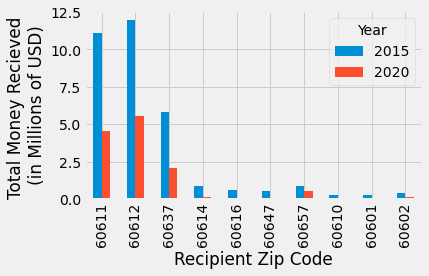

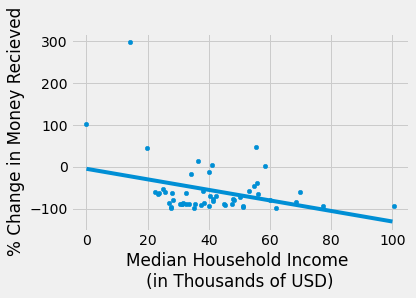

In [16]:
# making graphs
wrtzip_graph = change_wrt_zip.sort_values(by = 'abs_change', ascending = False)[['total_usd2015','total_usd2020']].head(10)
wrtzip_graph.columns = ['2015','2020']
wrtzip_graph.plot(kind='bar')
plt.legend(title = "Year")
plt.xlabel('Recipient Zip Code')
plt.ylabel('Total Money Recieved \n(in Millions of USD)')
plt.tight_layout()
# plt.savefig("zipvsmoney", dpi=400, bbox_inches = 'tight')

import scipy
from scipy import stats
change_wrt_zip.plot.scatter('income', 'percent_change')
plt.xlabel('Median Household Income \n(in Thousands of USD)')
plt.ylabel('% Change in Money Recieved')
plt.tight_layout()
plt.plot([0,100],[-4.8338,-130.90979]) #plotting line of best fit, used line below to find equation
scipy.stats.linregress(change_wrt_zip['income'],change_wrt_zip['percent_change'])
# plt.savefig("incomevschange", dpi=400, bbox_inches = 'tight')

len(change_wrt_zip.query('percent_change < 0'))

### doctors in top zip codes

In [17]:
ownership2020['dr_firstname']\
= ownership2020['dr_firstname'].apply(str.lower).apply(str.title)

ownership2020['dr_lastname']\
= ownership2020['dr_lastname'].apply(str.lower).apply(str.title)

ownership2020['recipient_address1']\
= ownership2020['recipient_address1'].apply(str.lower)
ownership2020['recipient_address1']\
= ownership2020['recipient_address1'].str.replace('.','').apply(str.title)

ownership2020

,recipient_zip,dr_id,dr_firstname,dr_lastname,recipient_address1
0,07002,134335,Aysha,Khalid,1225 Kennedy Blvd
1,07042,997719,Jamie,Koprivnikar,39 High Street
2,43214,32057,Peter,Kourlas,810 Jasonway Ave
3,07746,887574,Gurpreet,Lamba,1 Milton Ct
4,08873,138170,Craig,Lampert,75 Veronica Ave
...,...,...,...,...,...
3233,92374,355094,John,Steinmann,1901 W Lugonia Avenue
3234,92374,61179,Gail,Hopkins,1901 Wlugonia Avenue
3235,92374,566874,John,Skubic,1901 W Lugonia Avenue
3236,92374,445315,Paul,Burton,1901 W Lugonia Avenue


In [18]:
len(ownership2015.query('recipient_zip == "60611" or recipient_zip == "60612" or recipient_zip == "60637"')), \
len(ownership2020.query('recipient_zip == "60611" or recipient_zip == "60612" or recipient_zip == "60637"'))


(54, 11)

In [19]:
len(ownership2015.query('recipient_zip == "6064" or recipient_zip == "60616" or recipient_zip == "60647" or recipient_zip == "60610" or recipient_zip == "60601" or recipient_zip == "60602"')),\
len(ownership2020.query('recipient_zip == "6064" or recipient_zip == "60616" or recipient_zip == "60647" or recipient_zip == "60610" or recipient_zip == "60601" or recipient_zip == "60602"'))

(20, 3)

In [20]:
ownership2015.query('recipient_zip == "60611"')[['recipient_zip','dr_firstname','dr_lastname','recipient_address1']]
# table11.columns = [['Zip Code', 'Physician First Name','Last Name','Address']]
# table11.drop_duplicates()

,recipient_zip,dr_firstname,dr_lastname,recipient_address1
344,60611,ALPESH,PATEL,675 N ST. CLAIR GALTER PAVILLION
796,60611,Jason,Koob,645 N Michigan Ave.
797,60611,Jason,Koob,645 N Michigan Ave.
1034,60611,Jason,Koob,645 N Michigan Ave.
1035,60611,Jason,Koob,645 N Michigan Ave.
1036,60611,Jason,Koob,645 N Michigan Ave.
1441,60611,Jason,Primer,676 N Saint Clair St
1694,60611,Simon,Yoo,680 N Lake Shore Dr
2057,60611,Daniel,Dalton,676 N St Clair
2115,60611,John,Garnett,676 N St Clair


In [17]:
chicago2015.query('recipient_zip == "60611"').groupby(by = 'dr_id').sum().sort_values(by = 'total_usd', ascending = False)
# oh my. it added up the payer ids too

,payer_id,total_usd
dr_id,,
1157586.0,4000000261417,1000444.53
1034002.0,200000272878,859347.84
930321.0,9600000717318,407384.96
14337.0,11300000742124,343693.19
86272.0,26000000523818,284468.82
...,...,...
976506.0,100000000195,10.26
925817.0,100000010419,10.26
1057730.0,100000010562,10.25


In [21]:
ownership2015.query('dr_id == 1157586 or dr_id == 1034002 or dr_id == 143234 or dr_id == 7811 or dr_id == 337297')

,recipient_zip,dr_id,dr_firstname,dr_lastname,recipient_address1
3064,60611,1157586,SAMUEL,Stulberg,680 North Lake Shore Drive


In [22]:
ownership2015.query('recipient_zip == "60612"')

,recipient_zip,dr_id,dr_firstname,dr_lastname,recipient_address1
2055,60612,161867,Christopher,Coogan,1725 W Harrison St
2232,60612,303865,Kalyan,Latchamsetty,1725 W Harrison St
4241,60612,840692,Irene,Panayotou,"1634 W. Polk, Station A"
4242,60612,109256,David,Mutchnik,1634 W. Polk
4243,60612,1277619,Roberto,Espinosa,"1634 W. Polk, Station A"
4245,60612,1278905,Fakhruddin,Adamji,1634 W. Polk St.
4246,60612,2891,Jean,Farne,1634 W. Polk St.
4292,60612,167134,Thiti,Jaojaroenkul,1634 W. Polk
4294,60612,1389663,Vinod,Upadhyaya,1634 W. Polk
4296,60612,1284219,Alan,Free,1634 W. Polk St.


In [23]:
ownership2015.query('recipient_zip == "60637"')

,recipient_zip,dr_id,dr_firstname,dr_lastname,recipient_address1
1368,60637,847759,Paul,Chang,5841 S MARYLAND AVE


In [24]:
ownership2015.query('recipient_zip == "60601"')

,recipient_zip,dr_id,dr_firstname,dr_lastname,recipient_address1
1012,60601,1182441,George,Miz,340 E Randolph St


In [25]:
ownership2015.query('recipient_zip == "60602"')

,recipient_zip,dr_id,dr_firstname,dr_lastname,recipient_address1
2335,60602,79267,Juanita,Mora,111 N Wabash Ave
2407,60602,510881,Emelie,Medalle,800 Austin St.
3844,60602,343272,Brian,Lavery,111 W. Washington
3845,60602,232999,Arnold,Tatar,111 W. Washington
3846,60602,163968,Kevin,Hunt,111 W. Washington
3847,60602,280370,Victoria,Buchanan,111 W. Washington


### nature of payments

In [26]:
change_wrt_nature = vs_year(x_vs_y('nature')).set_index('nature') ##for the graph
change_wrt_nature[['total_usd2015','total_usd2020']] = change_wrt_nature[['total_usd2015','total_usd2020']]/100000
pretty_table(change_wrt_nature)

,total_usd2015,total_usd2020,change,abs_change,percent_change,abs_percent_change
nature,,,,,,
Ownership/investment interest,0.32,2.14,"181,979.53","181,979.53",560.930000,560.930000
Charitable Contribution,1.67,6.36,"468,835.64","468,835.64",280.410000,280.410000
Entertainment,0.09,0.0,"-8,591.84","8,591.84",-99.750000,99.750000
Continuing education speaker,8.18,0.83,"-735,415.77","735,415.77",-89.870000,89.870000
Travel and Lodging,34.7,4.05,"-3,064,668.48","3,064,668.48",-88.320000,88.320000
Honoraria,10.1,1.66,"-844,368.47","844,368.47",-83.580000,83.580000
Food and Beverage,28.38,5.43,"-2,294,656.46","2,294,656.46",-80.860000,80.860000
Royalty or License,69.23,15.29,"-5,393,693.67","5,393,693.67",-77.910000,77.910000
Non-continuing education speaker,94.38,37.54,"-5,684,380.35","5,684,380.35",-60.230000,60.230000


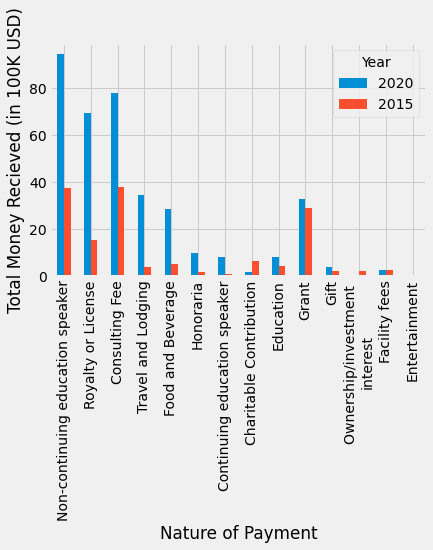

In [27]:
wrtnature_graph = change_wrt_nature.sort_values(by = 'abs_change', ascending = False)[['total_usd2015','total_usd2020']]
wrtnature_graph.columns = ['2020','2015']
wrtnature_graph = wrtnature_graph.plot(kind='bar')
# labelsfda = (["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"])
plt.legend(title = "Year")
plt.xlabel('Nature of Payment')
plt.ylabel('Total Money Recieved (in 100K USD)')
plt.savefig("naturevsmoney", dpi=400, bbox_inches = 'tight')
# plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,],labelsfda)

### nature for specific zip codes

In [28]:
def zip_wrt(z_value, y, x = 'total_usd', year1 = chicago2015, year2 = chicago2020):
    specific2015 = year1.query('recipient_zip == @z_value')
    specific2020 = year2.query('recipient_zip == @z_value')
    specific_change_wrt_y = vs_year(x_vs_y(y, year1 = specific2015, year2 = specific2020))
    return specific_change_wrt_y

60611

In [29]:
chicago60611_wrt_nature = zip_wrt("60611",'nature')
pretty_table(chicago60611_wrt_nature.head())

,nature,total_usd2015,total_usd2020,change,abs_change,percent_change,abs_percent_change
8,Gift,"206,405.85","7,852.08","-198,553.77","198,553.77",-96.200000,96.200000
11,Charitable Contribution,"93,392.31","181,250.0","87,857.69","87,857.69",94.070000,94.070000
10,Facility fees,"102,187.0","197,500.0","95,313.0","95,313.0",93.270000,93.270000
6,Continuing education speaker,"288,932.95","30,700.0","-258,232.95","258,232.95",-89.370000,89.370000
3,Travel and Lodging,"1,178,457.62","148,957.64","-1,029,499.98","1,029,499.98",-87.360000,87.360000


In [30]:
chicago60611_wrt_form = zip_wrt("60611",'form')
pretty_table(chicago60611_wrt_form.head())

,form,total_usd2015,total_usd2020,change,abs_change,percent_change,abs_percent_change
1,In-kind items and services,"1,710,188.25","340,134.79","-1,370,053.46","1,370,053.46",-80.110000,80.110000
0,Cash or cash equivalent,"9,413,658.31","4,205,262.28","-5,208,396.03","5,208,396.03",-55.330000,55.330000


60637

In [32]:
chicago60637_wrt_nature = zip_wrt("60637",'nature')
pretty_table(chicago60637_wrt_nature.head())

,nature,total_usd2015,total_usd2020,change,abs_change,percent_change,abs_percent_change
8,Gift,"21,596.79","121,431.77","99,834.98","99,834.98",462.270000,462.270000
6,Continuing education speaker,"142,837.7","2,650.0","-140,187.7","140,187.7",-98.140000,98.140000
5,Honoraria,"169,384.59","8,862.15","-160,522.44","160,522.44",-94.770000,94.770000
2,Travel and Lodging,"538,723.06","62,242.78","-476,480.28","476,480.28",-88.450000,88.450000
3,Food and Beverage,"232,111.32","45,001.71","-187,109.61","187,109.61",-80.610000,80.610000


In [33]:
chicago60637_wrt_form = zip_wrt("60637",'form')
pretty_table(chicago60637_wrt_form.head())

,form,total_usd2015,total_usd2020,change,abs_change,percent_change,abs_percent_change
0,Cash or cash equivalent,"5,020,265.33","1,444,845.48","-3,575,419.85","3,575,419.85",-71.220000,71.220000
1,In-kind items and services,"592,719.24","615,188.63","22,469.39","22,469.39",3.790000,3.790000


## comparing payer info

In [34]:
chicago2015.payer_name.nunique(), chicago2015.payer_id.nunique() #--> 757, 744, some names are duplicated! sort by id number
change_wrt_payer = vs_year(x_vs_y('payer_id'))

payers = chicago2015[['payer_name','payer_id']]
payers['payer_name'] = payers.payer_name.apply(str.lower)
payers = payers.drop_duplicates()
shortened_names = np.empty(0)
# for name in payers['payer_name']: ## for the graph labels
#     name = name.split(" ")[0]
#     name = name.split(",")[0]
#     name = name.split(" inc")[0]
#     name = name.split(" llc")[0]
#     shortened_names = np.append(shortened_names, name)
# payers['payer_name'] = shortened_names
change_wrt_payer = pd.merge(payers, change_wrt_payer, how='left', on='payer_id')
change_wrt_payer = change_wrt_payer.drop_duplicates()
#change_wrt_payer = change_wrt_payer.set_index('payer_name')

payersgraph_values = change_wrt_payer[['payer_name','total_usd2015','total_usd2020','abs_change']].set_index('payer_name')
payersgraph_values[['total_usd2015','total_usd2020']] = payersgraph_values[['total_usd2015','total_usd2020']]/10000

pretty_table(change_wrt_payer.sort_values(by = 'total_usd2020', ascending = False))

C:\Users\grace\AppData\Local\Temp/ipykernel_9836/3274789530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payers['payer_name'] = payers.payer_name.apply(str.lower)


,payer_name,payer_id,total_usd2015,total_usd2020,change,abs_change,percent_change,abs_percent_change
323,"abbvie, inc.",100000000204,"785,122.63","1,418,933.27","633,810.64","633,810.64",80.730000,80.730000
268,pfizer inc.,100000000286,"624,156.62","807,121.12","182,964.5","182,964.5",29.310000,29.310000
141,boston scientific corporation,100000005674,"647,550.86","740,481.69","92,930.83","92,930.83",14.350000,14.350000
40,astrazeneca pharmaceuticals lp,100000000146,"876,338.99","724,983.71","-151,355.28","151,355.28",-17.270000,17.270000
189,"medtronic usa, inc.",100000010383,"100,994.33","605,214.97","504,220.64","504,220.64",499.260000,499.260000
649,allergan inc.,100000000278,"420,553.42","545,912.04","125,358.62","125,358.62",29.810000,29.810000
110,"lilly usa, llc",100000000066,"104,183.1","490,465.78","386,282.68","386,282.68",370.770000,370.770000
492,"glaxosmithkline, llc.",100000005449,"168,552.15","456,796.38","288,244.23","288,244.23",171.010000,171.010000
368,aesculap ag,100000005661,"897,625.83","452,410.6","-445,215.23","445,215.23",-49.600000,49.600000
195,"medtronic vascular, inc.",100000010384,"688,615.8","434,578.25","-254,037.55","254,037.55",-36.890000,36.890000


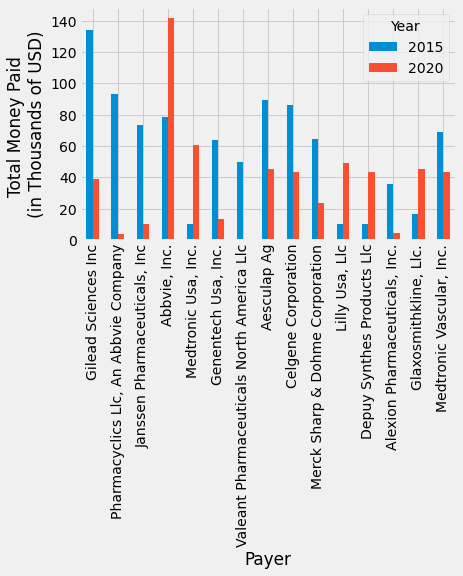

In [35]:
payersgraph = payersgraph_values.sort_values(by = 'abs_change', ascending = False)[['total_usd2015','total_usd2020']].head(15)
payersgraph.columns = ['2015','2020']
payersgraph = payersgraph.reset_index()
payersgraph['payer_name'] = payersgraph['payer_name'].apply(str.title)

payersgraph.set_index('payer_name').plot(kind='bar')
plt.legend(title = "Year")
#plt.rcParams["figure.figsize"] = (6,4)
plt.xlabel('Payer')
plt.ylabel('Total Money Paid \n(in Thousands of USD)')
#wrap_labels(payersgraph, 10)
plt.savefig("payervsmoney", dpi=400, bbox_inches = 'tight')

In [36]:
cont_edu_speaker2015 = chicago2015.query('nature == "Grant"').groupby(by = 'payer_name').sum().reset_index()[['payer_name','total_usd']]
cont_edu_speaker2020 = chicago2020.query('nature == "Grant"').groupby(by = 'payer_name').sum().reset_index()[['payer_name','total_usd']]
cont_edu_speaker = pd.merge(cont_edu_speaker2015,cont_edu_speaker2020, how = 'left',on='payer_name')

#### relationship between how big the payer is to how they change the nature of their payments? 
didn't end up using anything below!

In [38]:
def payer_id_wrt(z_value, y, x = 'total_usd', year1 = chicago2015, year2 = chicago2020):
    specific2015 = year1.query('payer_id == @z_value')
    specific2020 = year2.query('payer_id == @z_value')
    specific_change_wrt_y = vs_year(x_vs_y(y, year1 = specific2015, year2 = specific2020))
    return specific_change_wrt_y[[y,'percent_change','total_usd2015','total_usd2020']].sort_values(by = 'nature')

In [39]:
payer_nature = pd.DataFrame()
payer_nature['nature'] = change_wrt_nature['nature']

for i in range(len(change_wrt_payer)):
    payer_nature[change_wrt_payer['payer_name'][i]] = payer_id_wrt(change_wrt_payer['payer_id'][i],'nature')['percent_change']
pretty_table(payer_nature)

KeyError: 'nature'

pfizer

In [ ]:
pfizer_wrt_nature = payer_id_wrt(100000000286,'nature')
pretty_table(pfizer_wrt_nature.sort_values(by = 'percent_change', ascending = False))
pd.pivot(pfizer_wrt_nature[['nature','total_usd2015']], index = 'total_usd2015', columns = 'nature')

astrazeneca pharmaceuticals lp

In [ ]:
astra_wrt_nature = payer_id_wrt(100000000146,'nature')
pretty_table(astra_wrt_nature.sort_values(by = 'percent_change', ascending = False))

### trend among what big vs. small payers are changing their nature? 
tried another approach but also couldnt figure it out

In [ ]:


# change_wrt_zip.query('percent_change < 200').plot.scatter('income', 'percent_change')
# plt.xlabel('Median Household Income \n(in Thousands of USD)')
# plt.ylabel('% Change in Money Recieved')
# plt.tight_layout()
# plt.savefig("incomevschange", dpi=400, bbox_inches = 'tight')

In [ ]:
# deciding what "big/small" payer means
len(change_wrt_payer) #--> 175 payers
len(change_wrt_payer.query('total_usd2015 < 10000')) #--> cutoff about halfway

#np.sum(change_wrt_payer['total_usd2020']) #-->13,733,079.79

# payersgraph_values.sort_values(by = 'total_usd2020', ascending = False)[['total_usd2015','total_usd2020']].head(100).plot(kind='bar')
# plt.rcParams["figure.figsize"] = (15,10)
# plt.xlabel('Payer')
# plt.ylabel('Total Money Paid \n(in 10K USD)')
## seems like 10*10k (100,000) is a good cutoff by looking at the graph

In [ ]:
small_big_wrt_nature = pd.DataFrame()
small_big_wrt_nature['nature'] = payer_nature['nature']
small_big_wrt_nature['small_payers'] = pd.Series()
small_big_wrt_nature['big_payers'] = pd.Series()

smallpayers = change_wrt_payer.query('total_usd2015 < 100000')[['payer_name','payer_id']]
smallpayers_wrt_nature = pd.DataFrame()
for id in smallpayers['payer_id']:
    i_wrt_nature = payer_id_wrt(id,'nature')
    #smallpayers_wrt_nature = pd.merge(smallpayers_wrt_nature, i_wrt_nature, how = 'outer', on = 'nature')
    print(i_wrt_nature)
#smallpayers_wrt_nature

In [35]:
chicago2015.head()

,teaching_hospital,recipient_zip,dr_id,dr_firstname,dr_lastname,payer_name,payer_id,payer_state,total_usd,payment_date,form,nature
0,NaN,60637,1070767.0,RYAN,BAIR,Cianna Medical Inc,100000061318,CA,56.28,12/09/2015,Cash or cash equivalent,Food and Beverage
1,NaN,60611,1102258.0,SARAH,FRIEDEWALD,Cianna Medical Inc,100000061318,CA,19.73,10/30/2015,Cash or cash equivalent,Food and Beverage
2,NaN,60611,1102258.0,SARAH,FRIEDEWALD,Cianna Medical Inc,100000061318,CA,170.00,04/26/2015,Cash or cash equivalent,Food and Beverage
3,NaN,60654,807037.0,NATHANIEL,LAWSON,Dental Material Gesellschaft mbH,100000010532,NaN,203.50,03/15/2015,Cash or cash equivalent,Food and Beverage
4,NaN,60654,807037.0,NATHANIEL,LAWSON,Dental Material Gesellschaft mbH,100000010532,NaN,145.80,03/14/2015,Cash or cash equivalent,Food and Beverage


In [38]:
table = chicago2015.pivot_table(chicago2015, values='total_usd', index=['payer_name'],
                    columns=['nature'], aggfunc=np.sum, fill_value=0)

TypeError: pivot_table() got multiple values for argument 'values'